## Using pandas rolling function

### 1. Set up environment

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Get data from yahoo.finance

In [2]:
gld = pdr.get_data_yahoo('GLD', '2016-11-08')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20729400,116.110001


### 3. Discard unneeded data

In [3]:
gld_close = pd.DataFrame(gld.Close)

### 4. Use rolling method to compute moving averages

In [4]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()
gld_close['MA_21'] = gld_close.Close.rolling(21).mean()

In [5]:
gld_close['MA_9'].head(12)

Date
2016-11-08           NaN
2016-11-09           NaN
2016-11-10           NaN
2016-11-11           NaN
2016-11-14           NaN
2016-11-15           NaN
2016-11-16           NaN
2016-11-17           NaN
2016-11-18           NaN
2016-11-21    117.929999
2016-11-22    117.256666
2016-11-23    116.587778
Name: MA_9, dtype: float64

### 5. Plot data and moving averages

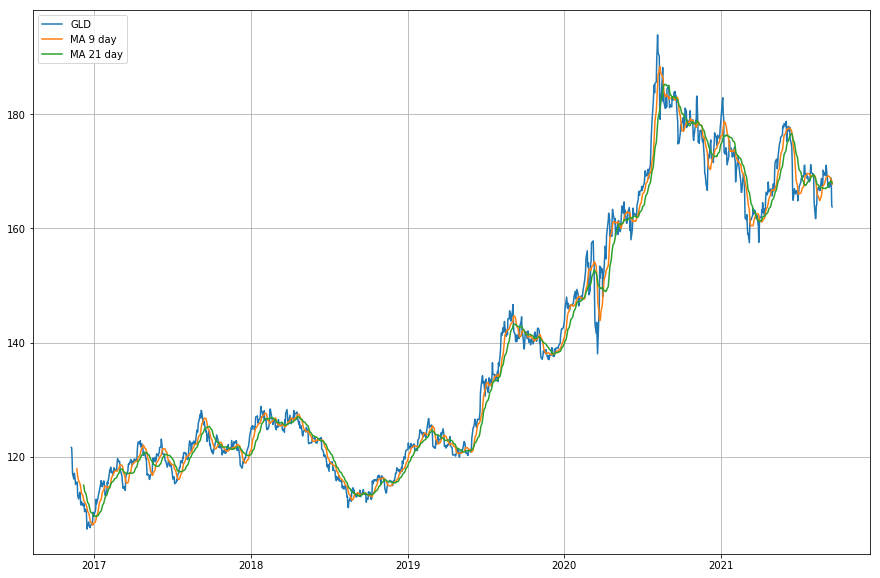

In [6]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close['Close'],label='GLD')
plt.plot(gld_close['MA_9'], label='MA 9 day')
plt.plot(gld_close['MA_21'], label='MA 21 day')
plt.legend(loc=2)

### 6. Compute log change (instantaneous rate of return)

In [11]:
# print(gld_close["Close"].tail(10))
# print(gld_close["Close"].shift().tail(10))
gld_close["change"] = np.log(gld_close["Close"] / gld_close["Close"].shift())

### 7. Plot reveals noisy data centered around 0

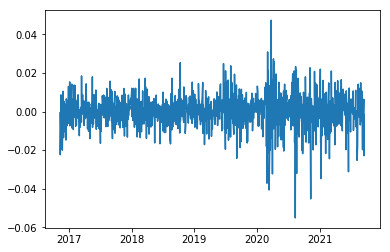

In [12]:
plt.plot(gld_close.change)

### 8. Compute rolling historical volatility, offset using .shift() method

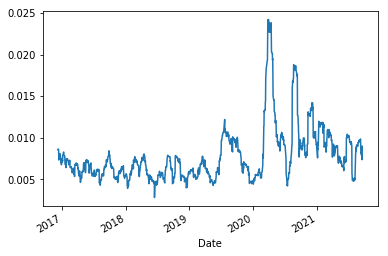

In [13]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()